In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [411]:
data_set = pd.read_csv('../data_raw/train.csv')

In [412]:
data_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [413]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [414]:
data_set.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,5847.000000,5847.000000,5.847000e+03,5809.000000,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,5.286452,9.653742
std,1736.398890,3.194949,9.237971e+04,0.806668,11.275966
min,1.000000,1998.000000,1.710000e+02,2.000000,0.440000
25%,1509.500000,2012.000000,3.346750e+04,5.000000,3.550000
50%,3015.000000,2014.000000,5.257600e+04,5.000000,5.750000
75%,4517.500000,2016.000000,7.249050e+04,5.000000,10.250000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [415]:
print(data_set)

      Unnamed: 0                              Name    Location  Year  \
0              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1              2                      Honda Jazz V     Chennai  2011   
2              3                 Maruti Ertiga VDI     Chennai  2012   
3              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4              6            Nissan Micra Diesel XV      Jaipur  2013   
...          ...                               ...         ...   ...   
5842        6014                  Maruti Swift VDI       Delhi  2014   
5843        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
5844        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
5845        6017                Maruti Wagon R VXI     Kolkata  2013   
5846        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 41000    Diesel       Manual      First  19.

#### b.Remove the units from some of the attributes and only keep the numerical values (forexample remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from “New_price”).

In [416]:
data_set['Mileage'] = data_set['Mileage'].str.replace(' kmpl', '')
data_set['Mileage'] = data_set['Mileage'].str.replace(' km/kg', '')
data_set['Mileage'] = pd.to_numeric(data_set['Mileage'], errors='coerce')

In [417]:
data_set['Engine'] = data_set['Engine'].str.replace(' CC', '')
data_set['Engine'] = pd.to_numeric(data_set['Engine'], errors='coerce')

In [418]:
data_set['Power'] = data_set['Power'].str.replace('null', '0.0')
data_set['Power'] = data_set['Power'].str.replace(' bhp', '')
data_set['Power'] = pd.to_numeric(data_set['Power'], errors='coerce')

In [419]:
data_set['New_Price'] = data_set['New_Price'].str.replace(' Lakh', '')
data_set['New_Price'] = pd.to_numeric(data_set['New_Price'], errors='coerce')

In [420]:
data_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50


#### a.Look for the missing values in all the columns and either impute them (replace with mean,median, or mode) or drop them. Justify your action for this task. 


In [421]:
# Missing values in each column:
data_set.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5049
Price                   0
dtype: int64

In [422]:
data_set['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage = ",np.mean(data_set['Mileage']))
data_set.fillna({'Mileage': np.mean(data_set['Mileage'])}, inplace=True)


Mean of Mileage =  18.283619293712317


/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/1327931223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Mileage'].replace(0.0,np.nan,inplace=True)


In [423]:
data_set['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(data_set['Engine']))
data_set.fillna({'Engine': np.mean(data_set['Engine'])}, inplace=True)

Mean of Engine = 1631.552572706935


/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/2109399130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Engine'].replace(0.0,np.nan,inplace=True)


In [424]:
data_set['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(data_set['Power']))
data_set.fillna({'Power': np.mean(data_set['Power'])}, inplace=True)

Mean of Power = 113.80314403717087


/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/2480071014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Power'].replace(0.0,np.nan,inplace=True)


In [425]:
data_set['New_Price'].replace(0.0,np.nan,inplace=True)
print("Mean of New_Price =",np.mean(data_set['New_Price']))
data_set.fillna({'New_Price': np.mean(data_set['New_Price'])}, inplace=True)
data_set['New_Price']=data_set['New_Price'].fillna(np.mean(data_set['New_Price']))

Mean of New_Price = 20.89221804511278


/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/3053776999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['New_Price'].replace(0.0,np.nan,inplace=True)


/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/566603442.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set[col].fillna(data_set[col].mean(), inplace=True)
/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/566603442.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

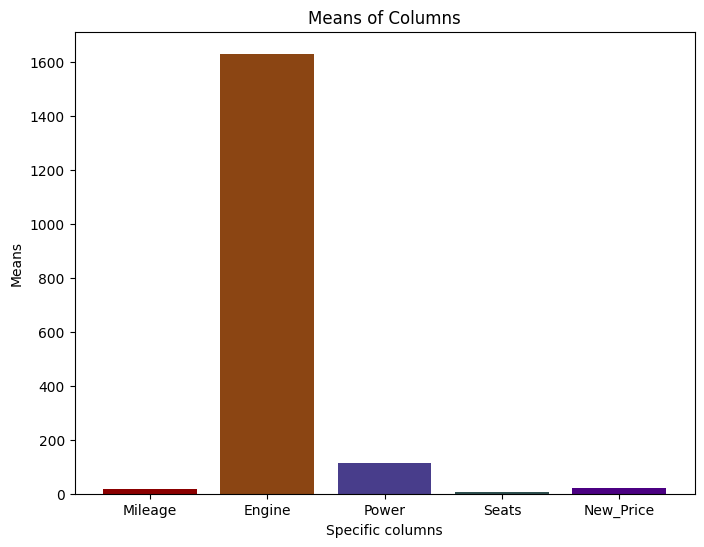

In [426]:
columns_to_fill = ["Mileage", "Engine", "Power", "Seats", "New_Price"]
# pastel_colors = ['#FFC3C0', '#FFDBAC', '#FFF8DC', '#E0FFFF', '#E6E6FA']
dark_colors = ['#8B0000', '#8B4513', '#483D8B', '#2F4F4F', '#4B0082']
for col, color in zip(columns_to_fill, dark_colors):
    if col == "Seats":
        data_set[col].fillna(data_set[col].mode()[0], inplace=True)
    else:
        data_set[col].fillna(data_set[col].mean(), inplace=True)

means = [data_set[col].mean() for col in columns_to_fill]
column_names = ["Mileage", "Engine", "Power", "Seats", "New_Price"]


plt.figure(figsize=(8, 6))
plt.bar(column_names, means, color=dark_colors)
plt.xlabel("Specific columns")
plt.ylabel("Means")
plt.title("Means of Columns")

plt.savefig("../results/means_of_columns.png")

plt.show()

In [427]:
data_set["Mileage"].fillna(data_set["Mileage"].mean(), inplace=True)
data_set["Engine"].fillna(data_set["Engine"].mean(), inplace=True)
data_set["Power"].fillna(data_set["Power"].mean(), inplace=True)
data_set["Seats"].fillna(data_set["Seats"].mode()[0], inplace=True)
data_set["New_Price"].fillna(0, inplace=True)

data_set.dropna(inplace=True)

/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/4202284495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set["Mileage"].fillna(data_set["Mileage"].mean(), inplace=True)
/var/folders/sx/821x_2t93zj9437z5pc0wmbh0000gn/T/ipykernel_34498/4202284495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [428]:
print(data_set)

      Unnamed: 0                              Name    Location  Year  \
0              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1              2                      Honda Jazz V     Chennai  2011   
2              3                 Maruti Ertiga VDI     Chennai  2012   
3              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4              6            Nissan Micra Diesel XV      Jaipur  2013   
...          ...                               ...         ...   ...   
5842        6014                  Maruti Swift VDI       Delhi  2014   
5843        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
5844        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
5845        6017                Maruti Wagon R VXI     Kolkata  2013   
5846        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 41000    Diesel       Manual      First